In [109]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [162]:
import numpy as np
import seaborn as sns
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import datetime  as dt
import category_encoders as ce

# Resono

In [111]:
resono = pd.read_csv('resono_all_3.csv')
resono = resono.drop(['Unnamed: 0'], axis=1)
resono['Location'].unique()

array(['Sarphatipark', 'Rembrandtpark Noord', 'Rembrandtpark Zuid',
       'Vondelpark Oost', 'Vondelpark West', 'Oosterpark',
       'Westergasfabriek', 'Erasmuspark', 'Westerpark',
       'Westerpark Centrum', 'Vondelpark Oost 3', 'Westerpark West',
       'Westerpark Oost', 'Vondelpark Oost 2', 'Vondelpark Oost 1'],
      dtype=object)

# Holidays

In [112]:
holiday = pd.read_csv('holidays.csv')

holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     347 non-null    int64 
 1   End_Dates      347 non-null    object
 2   Holiday_Name   347 non-null    object
 3   Holiday_Count  347 non-null    int64 
 4   Year           347 non-null    int64 
 5   Month          347 non-null    int64 
 6   Day            347 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 19.1+ KB


In [113]:

holiday.loc[(holiday['Month'] == 1) & (holiday['Day'] == 1)]

,Unnamed: 0,End_Dates,Holiday_Name,Holiday_Count,Year,Month,Day
0,0,2020-01-01,Christmas holiday,1,2020,1,1
1,1,2020-01-01,New year,1,2020,1,1
128,128,2021-01-01,Christmas holiday,1,2021,1,1
129,129,2021-01-01,New year,1,2021,1,1
227,227,2022-01-01,Christmas holiday,1,2022,1,1
228,228,2022-01-01,New year,1,2022,1,1


# Clearning

In [114]:
holiday = holiday.drop(['Unnamed: 0'], axis = 1)
holiday

,End_Dates,Holiday_Name,Holiday_Count,Year,Month,Day
0,2020-01-01,Christmas holiday,1,2020,1,1
1,2020-01-01,New year,1,2020,1,1
2,2020-01-02,Christmas holiday,1,2020,1,2
3,2020-01-03,Christmas holiday,1,2020,1,3
4,2020-01-04,Christmas holiday,1,2020,1,4
...,...,...,...,...,...,...
342,2022-12-27,Christmas holiday,1,2022,12,27
343,2022-12-28,Christmas holiday,1,2022,12,28
344,2022-12-29,Christmas holiday,1,2022,12,29
345,2022-12-30,Christmas holiday,1,2022,12,30


# Merge

In [115]:
Resono_Holi = pd.merge(resono, holiday, how = 'left', on = 'End_Dates')
Resono_Holi

,Location,Locationcode,Start,End,Visits,Start_Dates,Start_Time,End_Dates,End_Time,Holiday_Name,Holiday_Count,Year,Month,Day
0,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:00:00+00:00,2020-09-30T00:14:59+00:00,3,2020-09-30,00:00:00,2020-09-30,00:14:59,NaN,NaN,NaN,NaN,NaN
1,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:15:00+00:00,2020-09-30T00:29:59+00:00,2,2020-09-30,00:15:00,2020-09-30,00:29:59,NaN,NaN,NaN,NaN,NaN
2,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:30:00+00:00,2020-09-30T00:44:59+00:00,2,2020-09-30,00:30:00,2020-09-30,00:44:59,NaN,NaN,NaN,NaN,NaN
3,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:45:00+00:00,2020-09-30T00:59:59+00:00,2,2020-09-30,00:45:00,2020-09-30,00:59:59,NaN,NaN,NaN,NaN,NaN
4,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T01:00:00+00:00,2020-09-30T01:14:59+00:00,1,2020-09-30,01:00:00,2020-09-30,01:14:59,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503807,Vondelpark West,2deaade4-d687-47da-8c86-12c3f070f3d5,2021-02-21T23:30:00+00:00,2021-02-21T23:44:59+00:00,211,2021-02-21,23:30:00,2021-02-21,23:44:59,Spring holiday,1.0,2021.0,2.0,21.0
503808,Westerpark,f7ef0411-2b8a-4f71-862f-4d4571838976,2021-02-21T23:30:00+00:00,2021-02-21T23:44:59+00:00,22,2021-02-21,23:30:00,2021-02-21,23:44:59,Spring holiday,1.0,2021.0,2.0,21.0
503809,Oosterpark,9aa5b4ac-505e-4da6-977d-edc87469781d,2021-02-21T23:30:00+00:00,2021-02-21T23:44:59+00:00,245,2021-02-21,23:30:00,2021-02-21,23:44:59,Spring holiday,1.0,2021.0,2.0,21.0
503810,Westergasfabriek,1dd13bd7-2692-43bd-aaff-af55efcf5023,2021-02-21T23:30:00+00:00,2021-02-21T23:44:59+00:00,1,2021-02-21,23:30:00,2021-02-21,23:44:59,Spring holiday,1.0,2021.0,2.0,21.0


In [116]:
Resono_Holi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503812 entries, 0 to 503811
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       503812 non-null  object 
 1   Locationcode   503812 non-null  object 
 2   Start          503812 non-null  object 
 3   End            503812 non-null  object 
 4   Visits         503812 non-null  int64  
 5   Start_Dates    503812 non-null  object 
 6   Start_Time     503812 non-null  object 
 7   End_Dates      503812 non-null  object 
 8   End_Time       503812 non-null  object 
 9   Holiday_Name   134759 non-null  object 
 10  Holiday_Count  134759 non-null  float64
 11  Year           134759 non-null  float64
 12  Month          134759 non-null  float64
 13  Day            134759 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 57.7+ MB


In [117]:
#fill the blank of Holiday count, year, month, day
Resono_Holi['Holiday_Count'] = Resono_Holi['Holiday_Count'].replace(np.nan, 0)
Resono_Holi['Year'] = pd.to_datetime(Resono_Holi['End_Dates']).dt.year
Resono_Holi['Month'] = pd.to_datetime(Resono_Holi['End_Dates']).dt.month
Resono_Holi['Day'] = pd.to_datetime(Resono_Holi['End_Dates']).dt.day

cols=["Month","Day"]
Resono_Holi['MMDD'] = Resono_Holi[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [118]:
Resono_Holi

,Location,Locationcode,Start,End,Visits,Start_Dates,Start_Time,End_Dates,End_Time,Holiday_Name,Holiday_Count,Year,Month,Day,MMDD
0,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:00:00+00:00,2020-09-30T00:14:59+00:00,3,2020-09-30,00:00:00,2020-09-30,00:14:59,NaN,0.0,2020,9,30,9-30
1,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:15:00+00:00,2020-09-30T00:29:59+00:00,2,2020-09-30,00:15:00,2020-09-30,00:29:59,NaN,0.0,2020,9,30,9-30
2,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:30:00+00:00,2020-09-30T00:44:59+00:00,2,2020-09-30,00:30:00,2020-09-30,00:44:59,NaN,0.0,2020,9,30,9-30
3,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:45:00+00:00,2020-09-30T00:59:59+00:00,2,2020-09-30,00:45:00,2020-09-30,00:59:59,NaN,0.0,2020,9,30,9-30
4,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T01:00:00+00:00,2020-09-30T01:14:59+00:00,1,2020-09-30,01:00:00,2020-09-30,01:14:59,NaN,0.0,2020,9,30,9-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503807,Vondelpark West,2deaade4-d687-47da-8c86-12c3f070f3d5,2021-02-21T23:30:00+00:00,2021-02-21T23:44:59+00:00,211,2021-02-21,23:30:00,2021-02-21,23:44:59,Spring holiday,1.0,2021,2,21,2-21
503808,Westerpark,f7ef0411-2b8a-4f71-862f-4d4571838976,2021-02-21T23:30:00+00:00,2021-02-21T23:44:59+00:00,22,2021-02-21,23:30:00,2021-02-21,23:44:59,Spring holiday,1.0,2021,2,21,2-21
503809,Oosterpark,9aa5b4ac-505e-4da6-977d-edc87469781d,2021-02-21T23:30:00+00:00,2021-02-21T23:44:59+00:00,245,2021-02-21,23:30:00,2021-02-21,23:44:59,Spring holiday,1.0,2021,2,21,2-21
503810,Westergasfabriek,1dd13bd7-2692-43bd-aaff-af55efcf5023,2021-02-21T23:30:00+00:00,2021-02-21T23:44:59+00:00,1,2021-02-21,23:30:00,2021-02-21,23:44:59,Spring holiday,1.0,2021,2,21,2-21


In [119]:
#this holiday_count is counting one to every holidays
Resono_Holi['Holiday_Count'].unique()

array([0., 1.])

# Rename Holidays to Combine 

In [120]:
"""
'Holiday_Name_Ascension Thursday', 

'Holiday_Name_New year', 'Holiday_Name_Boxing Day', 'Holiday_Name_Christmas Day', 'Holiday_Name_Christmas holiday',  => Christmas Holiday

'Holiday_Name_Easter Monday', 'Holiday_Name_Easter Sunday',  => Easter

'Holiday_Name_Fall holiday', 'Holiday_Name_Good Friday', 

'Holiday_Name_King's day', 

'Holiday_Name_Liberation Day', 

'Holiday_Name_May holiday', 

'Holiday_Name_Spring holiday',

'Holiday_Name_Summer holiday',

'Holiday_Name_Whit Monday', 'Holiday_Name_Whit Sunday'  => Whit
    
"""

"\n'Holiday_Name_Ascension Thursday', \n\n'Holiday_Name_New year', 'Holiday_Name_Boxing Day', 'Holiday_Name_Christmas Day', 'Holiday_Name_Christmas holiday',  => Christmas Holiday\n\n'Holiday_Name_Easter Monday', 'Holiday_Name_Easter Sunday',  => Easter\n\n'Holiday_Name_Fall holiday', 'Holiday_Name_Good Friday', \n\n'Holiday_Name_King's day', \n\n'Holiday_Name_Liberation Day', \n\n'Holiday_Name_May holiday', \n\n'Holiday_Name_Spring holiday',\n\n'Holiday_Name_Summer holiday',\n\n'Holiday_Name_Whit Monday', 'Holiday_Name_Whit Sunday'  => Whit\n    \n"

In [121]:
Resono_Holi['Holiday_Name'] = Resono_Holi['Holiday_Name'].replace(
                             ['Christmas Day', 'New year', 'Boxing Day', 'Holiday_Name_New year', 'Christmas holiday', 'Holiday_Name_Boxing Day'] ,'Winter holiday')

Resono_Holi['Holiday_Name'] = Resono_Holi['Holiday_Name'].replace(
                             ["King's day"] ,'Kings day')

Resono_Holi['Holiday_Name'] = Resono_Holi['Holiday_Name'].replace(
                             ['Easter Monday', 'Easter Sunday'] ,'Easter')

Resono_Holi['Holiday_Name'] = Resono_Holi['Holiday_Name'].replace(
                             ['Whit Monday', 'Whit Sunday'] ,'Whit')

In [122]:
Resono_Holi['Holiday_Name'].unique()

array([nan, 'Fall holiday', 'Winter holiday', 'Good Friday', 'Easter',
       'Kings day', 'Summer holiday', 'May holiday', 'Liberation Day',
       'Ascension Thursday', 'Whit', 'Spring holiday'], dtype=object)

# Day of Week

In [123]:
'''
Monday =0, Tuesday=1, Wednesday=2,Thursday =3,  Friday=4 ,  Saturday =5, Sunday =6
'''

Resono_Holi['End_Dates'] = Resono_Holi['End_Dates'].astype('datetime64[ns]')
Resono_Holi['Day_of_Week'] = Resono_Holi['End_Dates'].dt.dayofweek
Resono_Holi['Day_of_Week'].unique()

array([2, 3, 4, 5, 6, 0, 1], dtype=int64)

In [124]:
Resono_Holi

,Location,Locationcode,Start,End,Visits,Start_Dates,Start_Time,End_Dates,End_Time,Holiday_Name,Holiday_Count,Year,Month,Day,MMDD,Day_of_Week
0,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:00:00+00:00,2020-09-30T00:14:59+00:00,3,2020-09-30,00:00:00,2020-09-30,00:14:59,NaN,0.0,2020,9,30,9-30,2
1,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:15:00+00:00,2020-09-30T00:29:59+00:00,2,2020-09-30,00:15:00,2020-09-30,00:29:59,NaN,0.0,2020,9,30,9-30,2
2,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:30:00+00:00,2020-09-30T00:44:59+00:00,2,2020-09-30,00:30:00,2020-09-30,00:44:59,NaN,0.0,2020,9,30,9-30,2
3,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:45:00+00:00,2020-09-30T00:59:59+00:00,2,2020-09-30,00:45:00,2020-09-30,00:59:59,NaN,0.0,2020,9,30,9-30,2
4,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T01:00:00+00:00,2020-09-30T01:14:59+00:00,1,2020-09-30,01:00:00,2020-09-30,01:14:59,NaN,0.0,2020,9,30,9-30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503807,Vondelpark West,2deaade4-d687-47da-8c86-12c3f070f3d5,2021-02-21T23:30:00+00:00,2021-02-21T23:44:59+00:00,211,2021-02-21,23:30:00,2021-02-21,23:44:59,Spring holiday,1.0,2021,2,21,2-21,6
503808,Westerpark,f7ef0411-2b8a-4f71-862f-4d4571838976,2021-02-21T23:30:00+00:00,2021-02-21T23:44:59+00:00,22,2021-02-21,23:30:00,2021-02-21,23:44:59,Spring holiday,1.0,2021,2,21,2-21,6
503809,Oosterpark,9aa5b4ac-505e-4da6-977d-edc87469781d,2021-02-21T23:30:00+00:00,2021-02-21T23:44:59+00:00,245,2021-02-21,23:30:00,2021-02-21,23:44:59,Spring holiday,1.0,2021,2,21,2-21,6
503810,Westergasfabriek,1dd13bd7-2692-43bd-aaff-af55efcf5023,2021-02-21T23:30:00+00:00,2021-02-21T23:44:59+00:00,1,2021-02-21,23:30:00,2021-02-21,23:44:59,Spring holiday,1.0,2021,2,21,2-21,6


# Target Encoding

Bayesian encoders use information from dependent/target variables to encode the categorical data.

In target encoding, calculate the mean of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables, the posterior probability of the target replaces each category.\

At the end, the holiday_name has changed to a numeric variable to use for correlaion.

In [125]:
encoder = ce.TargetEncoder(cols='Holiday_Name')

In [126]:
encoder

TargetEncoder(cols='Holiday_Name')

In [131]:
Resono_Holi['Holiday_name'] = encoder.fit_transform(Resono_Holi['Holiday_Name'], Resono_Holi['Visits'])

In [139]:
encoder2 = ce.TargetEncoder(cols='Day_of_Week')

In [140]:
Resono_Holi['Week'] = encoder2.fit_transform(Resono_Holi['Day_of_Week'], Resono_Holi['Visits'])

In [141]:
Resono_Holi.head()

,Location,Locationcode,Start,End,Visits,Start_Dates,Start_Time,End_Dates,End_Time,Holiday_Name,Holiday_Count,Year,Month,Day,MMDD,Day_of_Week,Holiday_name,Week
0,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:00:00+00:00,2020-09-30T00:14:59+00:00,3,2020-09-30,00:00:00,2020-09-30,00:14:59,NaN,0.0,2020,9,30,9-30,2,408.771529,399.684033
1,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:15:00+00:00,2020-09-30T00:29:59+00:00,2,2020-09-30,00:15:00,2020-09-30,00:29:59,NaN,0.0,2020,9,30,9-30,2,408.771529,399.684033
2,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:30:00+00:00,2020-09-30T00:44:59+00:00,2,2020-09-30,00:30:00,2020-09-30,00:44:59,NaN,0.0,2020,9,30,9-30,2,408.771529,399.684033
3,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:45:00+00:00,2020-09-30T00:59:59+00:00,2,2020-09-30,00:45:00,2020-09-30,00:59:59,NaN,0.0,2020,9,30,9-30,2,408.771529,399.684033
4,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T01:00:00+00:00,2020-09-30T01:14:59+00:00,1,2020-09-30,01:00:00,2020-09-30,01:14:59,NaN,0.0,2020,9,30,9-30,2,408.771529,399.684033


In [190]:
Resono_Holi["Holiday_name"].loc[(Resono_Holi['Holiday_Name'] == "Spring holiday")].head()

501485    418.608939
501486    418.608939
501487    418.608939
501488    418.608939
501489    418.608939
Name: Holiday_name, dtype: float64

In [175]:
Resono_Holi['Holiday_Name'].unique()

array([nan, 'Fall holiday', 'Winter holiday', 'Good Friday', 'Easter',
       'Kings day', 'Summer holiday', 'May holiday', 'Liberation Day',
       'Ascension Thursday', 'Whit', 'Spring holiday'], dtype=object)

# One-hot Encoding

National holidays and school seasonal holidays are counted one by one.\

School Holidays:
  - Summar holiday
  - Spring holiday
  - Christmas holiday (it includes christmas day)
  - Fall holiday
  - May holiday (it includes liberty day)
  
National Holidays:
  - Ascension Thursday
  - Boxing Day
  - Easter
  - Good Friday
  - King's day
  - New year
  - Whit


In [142]:
# Holidays
Resono_Holi_Dummies = pd.get_dummies(Resono_Holi, columns=["Holiday_Name"])

# Day of Week
Resono_Holi_Dummies = pd.get_dummies(Resono_Holi_Dummies, columns=["Day_of_Week"])

In [143]:
Resono_Holi_Dummies.head()

,Location,Locationcode,Start,End,Visits,Start_Dates,Start_Time,End_Dates,End_Time,Holiday_Count,...,Holiday_Name_Summer holiday,Holiday_Name_Whit,Holiday_Name_Winter holiday,Day_of_Week_0,Day_of_Week_1,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6
0,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:00:00+00:00,2020-09-30T00:14:59+00:00,3,2020-09-30,00:00:00,2020-09-30,00:14:59,0.0,...,0,0,0,0,0,1,0,0,0,0
1,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:15:00+00:00,2020-09-30T00:29:59+00:00,2,2020-09-30,00:15:00,2020-09-30,00:29:59,0.0,...,0,0,0,0,0,1,0,0,0,0
2,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:30:00+00:00,2020-09-30T00:44:59+00:00,2,2020-09-30,00:30:00,2020-09-30,00:44:59,0.0,...,0,0,0,0,0,1,0,0,0,0
3,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T00:45:00+00:00,2020-09-30T00:59:59+00:00,2,2020-09-30,00:45:00,2020-09-30,00:59:59,0.0,...,0,0,0,0,0,1,0,0,0,0
4,Sarphatipark,0549b281-0465-407b-b76f-e0259a6a8348,2020-09-30T01:00:00+00:00,2020-09-30T01:14:59+00:00,1,2020-09-30,01:00:00,2020-09-30,01:14:59,0.0,...,0,0,0,0,0,1,0,0,0,0


# Correlation

In [144]:
Resono_Holi_Dummies.corr()

,Visits,Holiday_Count,Year,Month,Day,Holiday_name,Week,Holiday_Name_Ascension Thursday,Holiday_Name_Easter,Holiday_Name_Fall holiday,...,Holiday_Name_Summer holiday,Holiday_Name_Whit,Holiday_Name_Winter holiday,Day_of_Week_0,Day_of_Week_1,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6
Visits,1.000000,-0.061510,-0.490436,0.168462,0.001127,0.202971,0.029242,-0.026740,-0.025679,0.133174,...,-0.138730,-0.026528,-0.035123,-0.004219,0.017162,0.008156,0.001617,0.008595,-0.010614,-0.020710
Holiday_Count,-0.061510,1.000000,-0.056086,0.139550,0.130173,-0.303050,-0.097775,0.075844,0.085588,0.437095,...,0.534398,0.107372,0.496058,-0.024249,-0.046474,-0.020726,-0.026286,-0.019875,0.057982,0.079234
Year,-0.490436,-0.056086,1.000000,-0.534562,-0.109255,-0.289951,-0.020030,0.022435,0.025317,-0.292408,...,0.158076,0.031761,-0.041027,0.011058,0.004788,-0.016426,-0.019298,-0.010557,0.016843,0.013768
Month,0.168462,0.139550,-0.534562,1.000000,0.099282,0.098329,0.010675,-0.026230,-0.042850,0.187188,...,0.032639,-0.037134,0.092202,0.000497,0.008838,0.019798,0.013407,-0.022049,-0.019789,-0.000528
Day,0.001127,0.130173,-0.109255,0.099282,1.000000,0.038354,-0.013325,-0.012721,-0.063920,0.097731,...,0.044649,0.058803,0.108774,-0.009670,-0.010992,0.013665,-0.006365,-0.008564,0.011345,0.010288
Holiday_name,0.202971,-0.303050,-0.289951,0.098329,0.038354,1.000000,-0.002840,-0.131744,-0.126517,0.656124,...,-0.683497,-0.130699,-0.173043,-0.013715,0.007045,0.002384,-0.016114,-0.000858,0.017225,0.003837
Week,0.029242,-0.097775,-0.020030,0.010675,-0.013325,-0.002840,1.000000,0.006261,-0.054198,-0.063040,...,-0.012213,-0.067992,-0.042521,-0.144280,0.586918,0.278901,0.055290,0.293929,-0.362979,-0.708223
Holiday_Name_Ascension Thursday,-0.026740,0.075844,0.022435,-0.026230,-0.012721,-0.131744,0.006261,1.000000,-0.002370,-0.012105,...,-0.014800,-0.002974,-0.013738,-0.018577,-0.018497,-0.018990,0.113247,-0.018882,-0.018821,-0.018655
Holiday_Name_Easter,-0.025679,0.085588,0.025317,-0.042850,-0.063920,-0.126517,-0.054198,-0.002370,1.000000,-0.013660,...,-0.016701,-0.003356,-0.015503,0.053314,-0.020874,-0.021429,-0.020930,-0.021308,-0.021239,0.053004
Holiday_Name_Fall holiday,0.133174,0.437095,-0.292408,0.187188,0.097731,0.656124,-0.063040,-0.012105,-0.013660,1.000000,...,-0.085292,-0.017137,-0.079173,-0.018782,-0.022035,-0.005412,-0.025399,-0.020397,0.030768,0.061013


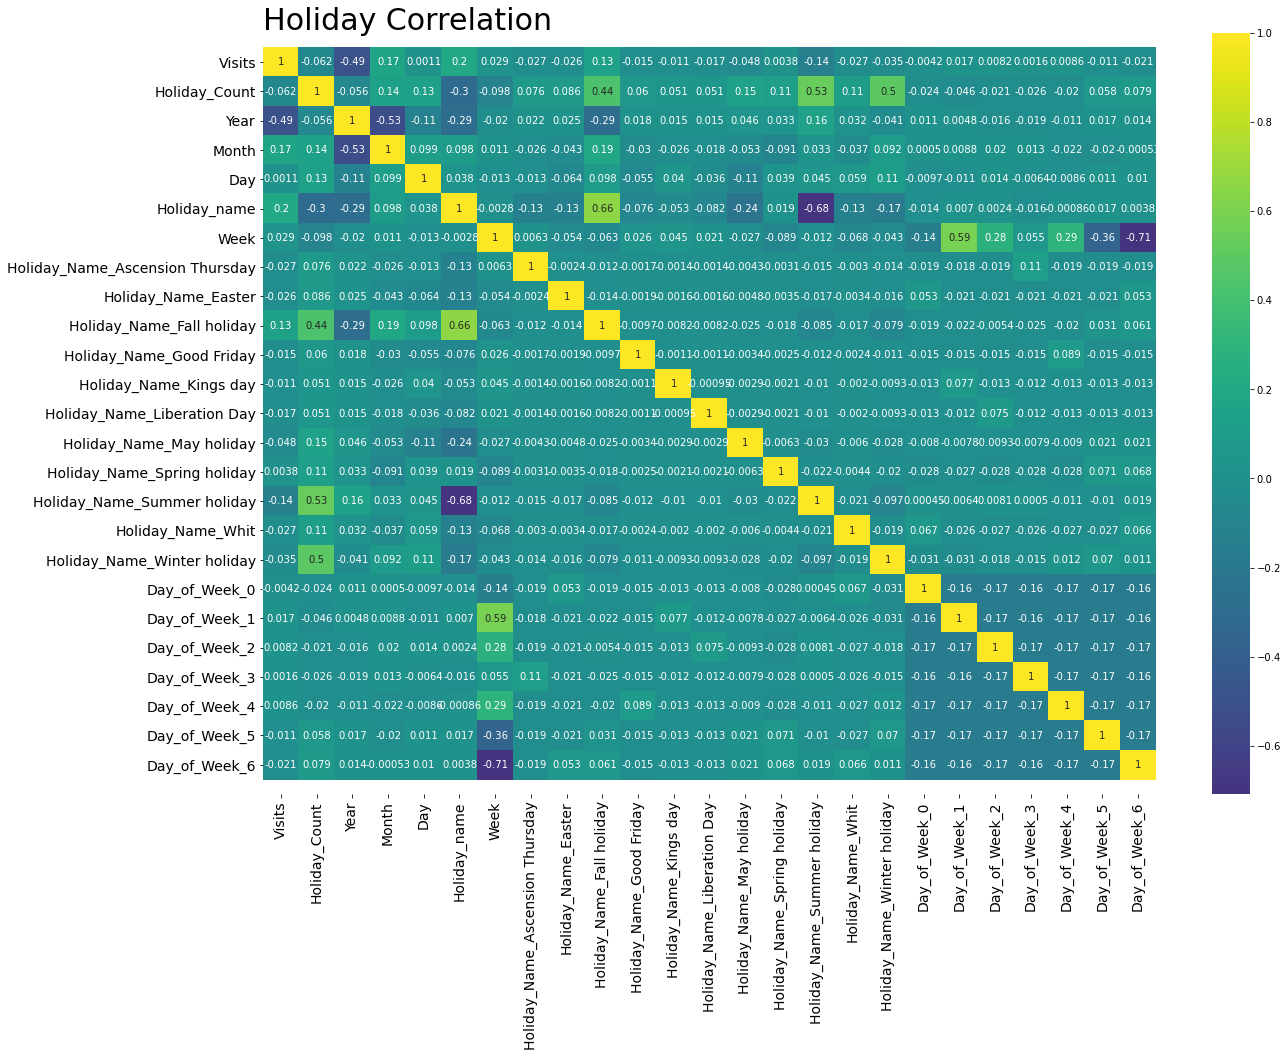

In [145]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(Resono_Holi_Dummies.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "Holiday Correlation", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

Summer holiday  of -0.1\
Fall holiday of 0.095


C:\Users\amr2-\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\amr2-\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\amr2-\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


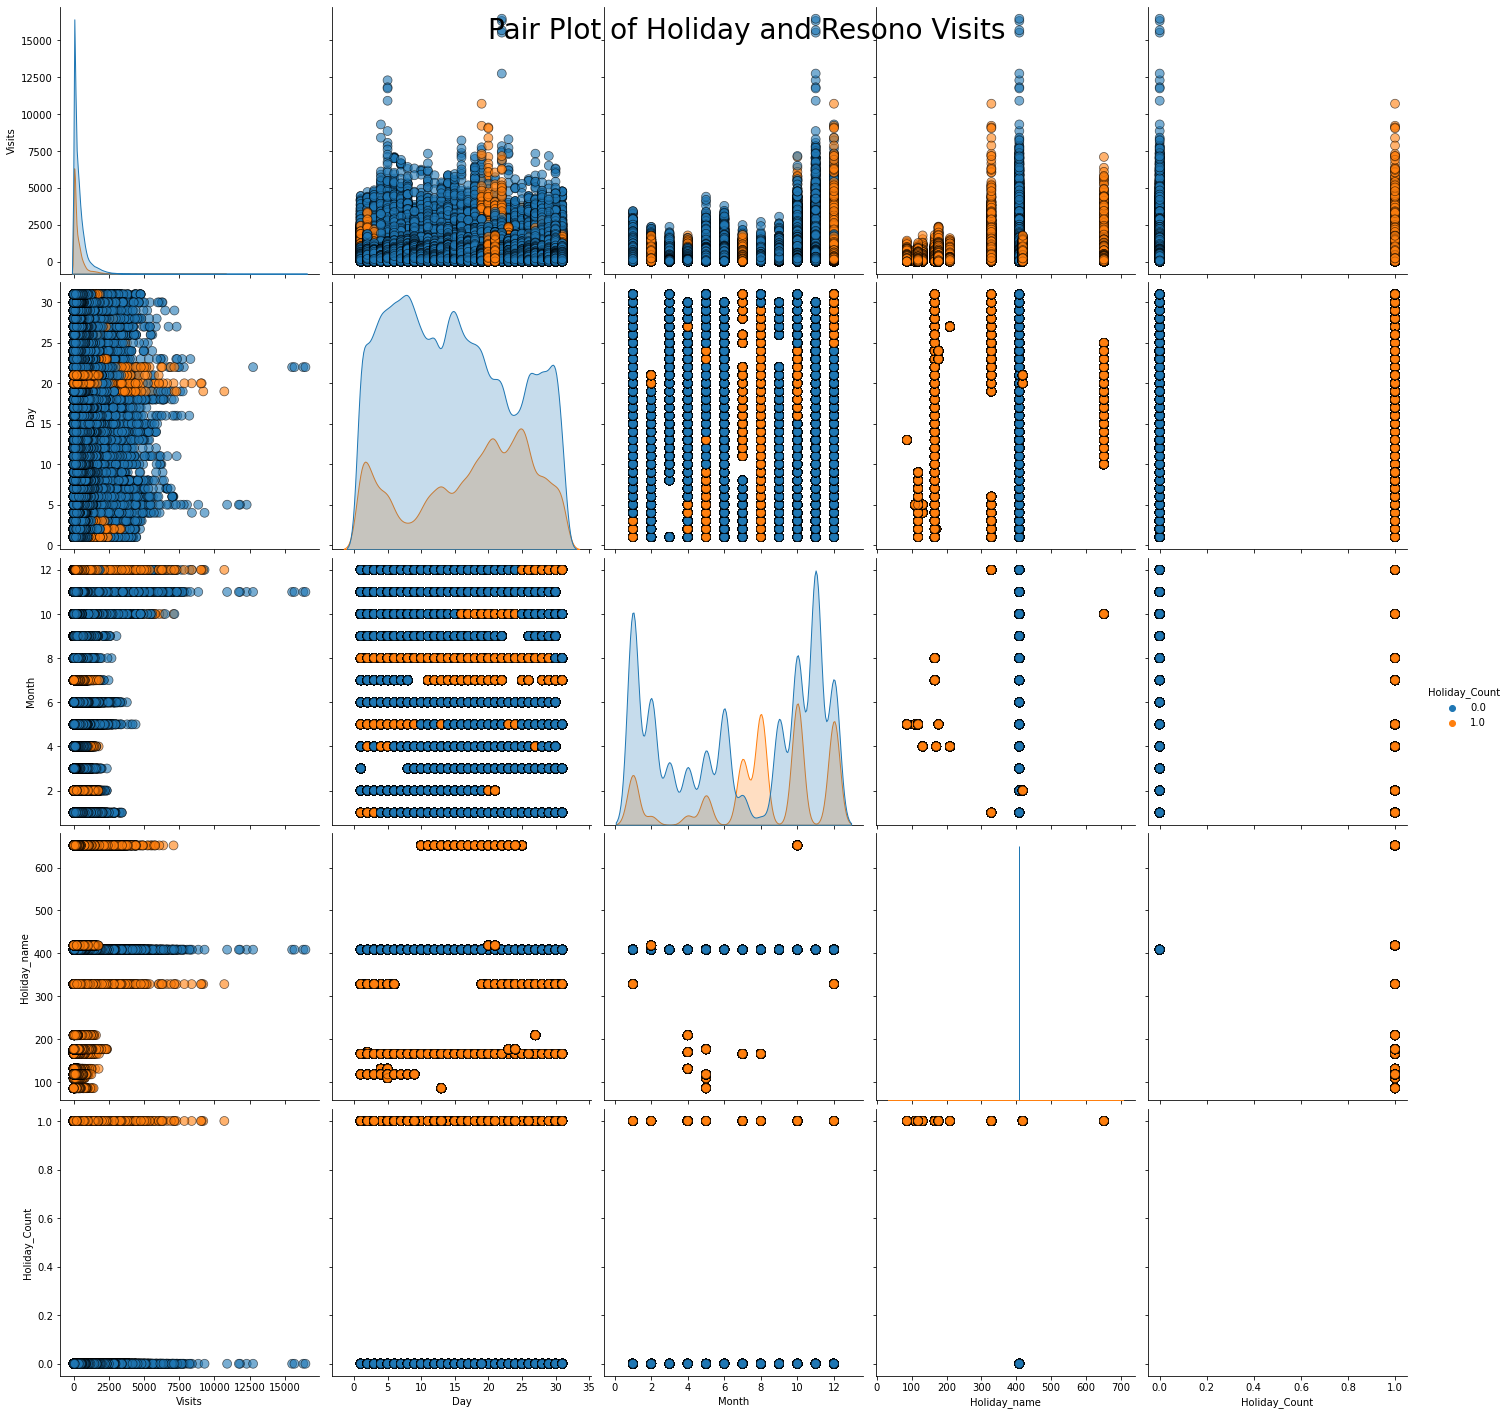

In [149]:
# Plot colored by continent for years 2000-2007
sns.pairplot(Resono_Holi_Dummies, hue = 'Holiday_Count',
             vars = ['Visits', 'Day', 'Month', 'Holiday_name'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);
# Title 
plt.suptitle('Pair Plot of Holiday and Resono Visits', 
             size = 28);

The meaning of numbers in Holiday_name:\
non-holiday 408.77152875\
Fall holiday 651.490854\
'Winter holiday', 328.561235	\
'Good Friday', 400.296557\
'Easter',131.414435\
'Kings day', 209.658333\
'Summer holiday',166.188435\
'May holiday', 118.440046\
'Liberation Day',109.591667\
'Ascension Thursday', 86.230114\
'Whit', 176.96733\
'Spring holiday'418.608939

In [192]:
mean = Resono_Holi_Dummies["Holiday_name"].to_numpy()

In [249]:
df_counts = Resono_Holi_Dummies.groupby(['Holiday_name', 'Visits']).size().reset_index(name='counts')


C:\Users\amr2-\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


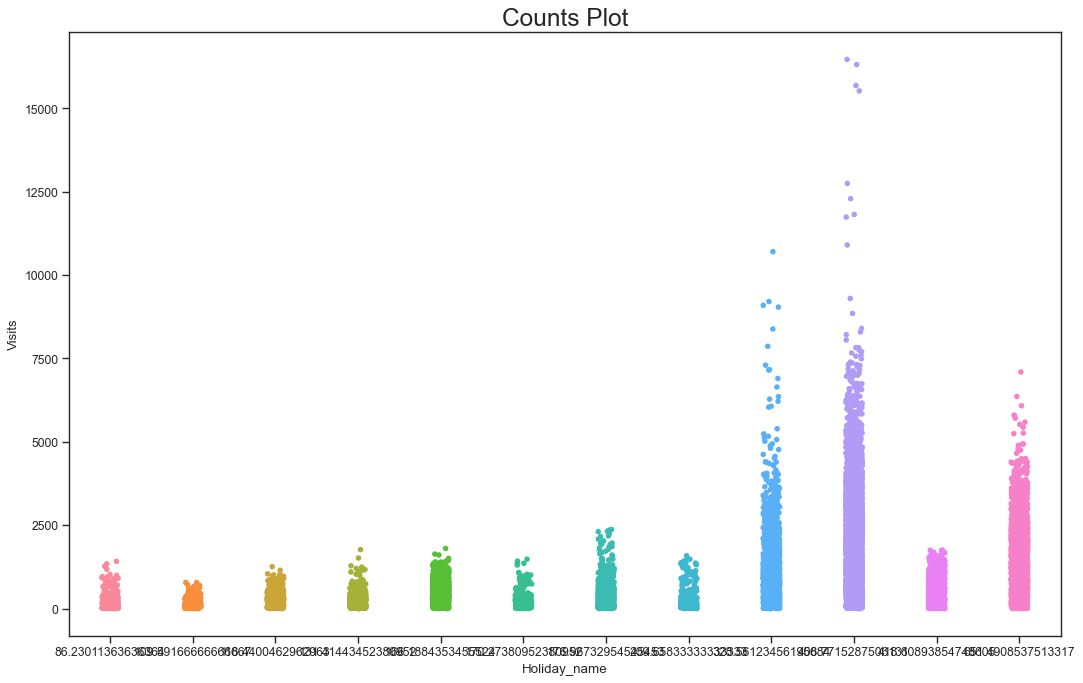

In [255]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
sns.stripplot(df_counts.Holiday_name, df_counts.Visits,ax=ax)

# Decorations
plt.title('Counts Plot', fontsize=22)
plt.show()

In [282]:
Resono_Holi.groupby('Holiday_Name').size().reset_index(name='counts')

,Holiday_Name,counts
0,Ascension Thursday,1056
1,Easter,1344
2,Fall holiday,32855
3,Good Friday,672
4,Kings day,480
5,Liberation Day,480
6,May holiday,4320
7,Spring holiday,2327
8,Summer holiday,47576
9,Whit,2112


In [278]:
df = Resono_Holi.groupby('Holiday_Name').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]


In [310]:
percent = dict(Resono_Holi.Holiday_Name.value_counts(normalize = True))
labels = [f'{k} percent: {v*100:.1f}%' for k,v in percent.items()]
labels

['Summer holiday percent: 35.3%',
 'Winter holiday percent: 30.8%',
 'Fall holiday percent: 24.4%',
 'May holiday percent: 3.2%',
 'Spring holiday percent: 1.7%',
 'Whit percent: 1.6%',
 'Easter percent: 1.0%',
 'Ascension Thursday percent: 0.8%',
 'Good Friday percent: 0.5%',
 'Liberation Day percent: 0.4%',
 'Kings day percent: 0.4%']

In [312]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [313]:
import squarify 

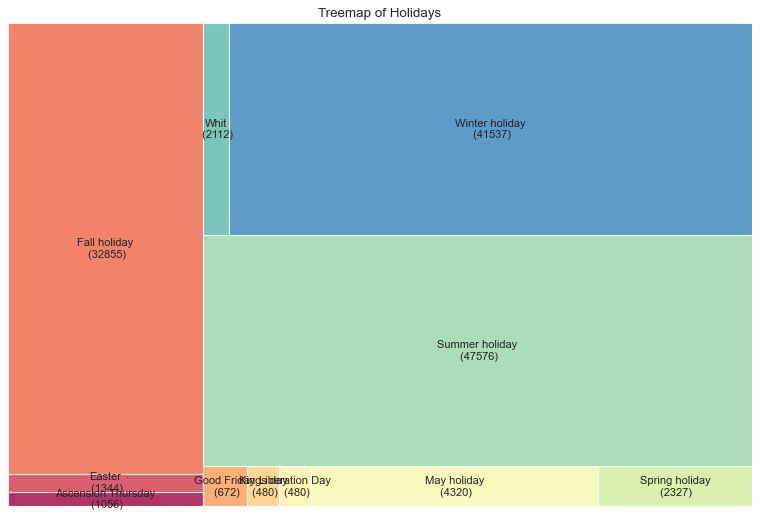

In [315]:
# Prepare Data
df = Resono_Holi.groupby('Holiday_Name').size().reset_index(name='counts')
label = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(label))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=label, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Holidays')
plt.axis('off')
plt.show()

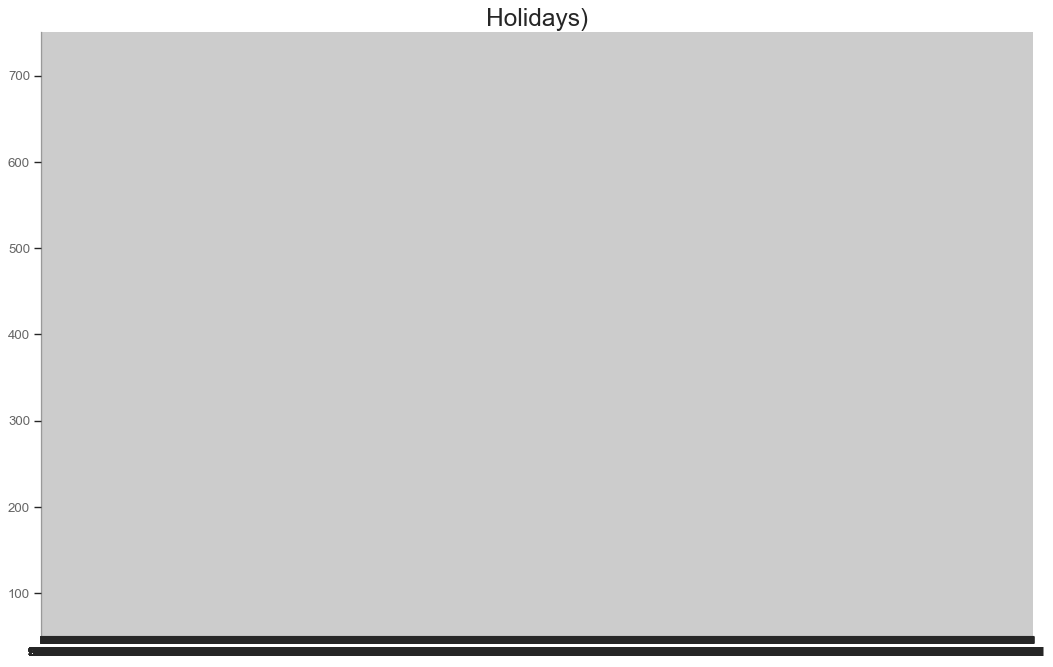

In [325]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('MMDD', 'Visits', data=Resono_Holi, color='tab:red', linestyle="None")

# Decoration
plt.ylim(50, 750)
xtick_location = Resono_Holi.index.tolist()[::12]
xtick_labels = [x[-4:] for x in Resono_Holi.MMDD.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Holidays)", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

In [326]:
Resono_Holi_Dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503812 entries, 0 to 503811
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Location                         503812 non-null  object        
 1   Locationcode                     503812 non-null  object        
 2   Start                            503812 non-null  object        
 3   End                              503812 non-null  object        
 4   Visits                           503812 non-null  int64         
 5   Start_Dates                      503812 non-null  object        
 6   Start_Time                       503812 non-null  object        
 7   End_Dates                        503812 non-null  datetime64[ns]
 8   End_Time                         503812 non-null  object        
 9   Holiday_Count                    503812 non-null  float64       
 10  Year                             503812 non-

C:\Users\amr2-\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

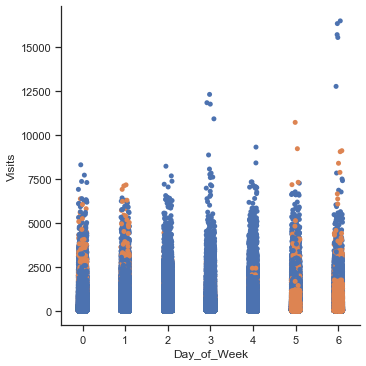

In [163]:
x1 = Resono_Holi['Day_of_Week']
y2 = Resono_Holi['Visits']


sns.catplot(x1, y2, hue = 'Holiday_Count', data = Resono_Holi)

C:\Users\amr2-\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


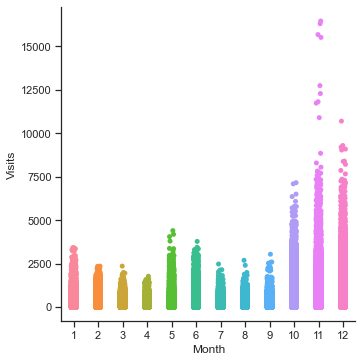

In [152]:
sns.set_theme(style = 'ticks', color_codes = True)
x = Resono_Holi_Dummies['Month']
y = Resono_Holi_Dummies['Visits']

sns.catplot(x, y, data = Resono_Holi_Dummies)
#kind="swarm"
#hue="Holiday_Count"

# EDA

Holiday visits are only 0.7% of the total visit.\
It is possibly the number of duplicated items in the resono data.\
*Review bottom: data on each month contains different amount.

In [235]:
print('Total Visit vs Holiday Visits.')
print('-----------------------------')
h= Resono_Holi['Visits'].loc[(Resono_Holi['Holiday_Count'])]
H = h.sum()
print ('Holiday:', H)

t = Resono_Holi['Visits']
T = t.sum()
print ('Total:', T)
print('-----------------------------')

r = round(H/T*100,2)
#ratio
print('ratio:', r, '%')

Total Visit vs Holiday Visits.
-----------------------------
Holiday: 1376677
Total: 196211983
-----------------------------
ratio: 0.7 %


# Number of Holiday Visit during the Season Period

In [200]:
Resono_Holi['Month'].unique()

array([ 9, 10, 11, 12,  4,  8,  1,  7,  6,  3,  5,  2], dtype=int64)

In [201]:
Resono_Holi['Holiday_Name'].unique()

array([nan, 'Fall holiday', 'Winter holiday', 'Good Friday', 'Easter',
       'Kings day', 'Summer holiday', 'May holiday', 'Liberation Day',
       'Ascension Thursday', 'Whit', 'Spring holiday'], dtype=object)

In [202]:
#Fall
print('Fall holidays are in October.')
print('-----------------------------')
fh= Resono_Holi['Visits'].loc[(Resono_Holi['Holiday_Name'] == 'Fall holiday')]
Fall_Holiday = fh.sum()
print ('fall holiday:', Fall_Holiday)

ft = Resono_Holi['Visits'].loc[(Resono_Holi['Month'] == 10)]
Fall_total = ft.sum()
print ('Octorber:', Fall_total)
print('-----------------------------')

fall_ratio = round(Fall_Holiday/Fall_total*100,2)
#ratio
print('ratio:', fall_ratio, '%')

Fall holidays are in October.
-----------------------------
fall holiday: 21404732
Octorber: 47056520
-----------------------------
ratio: 45.49 %


In [203]:
from sklearn import preprocessing
norm_fh = preprocessing.normalize([fh])
norm_fh

array([[0.00050383, 0.00106558, 0.00101925, ..., 0.00019111, 0.00015057,
        0.00079918]])

Text(0, 0.5, 'Count')

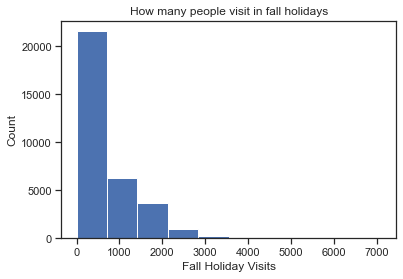

In [204]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(fh)
# set title and labels
ax.set_title('How many people visit in fall holidays')
ax.set_xlabel('Fall Holiday Visits')
ax.set_ylabel('Count')

In [206]:
#Winter
print('Winter holidays are in Dec-Jan.')
print('-----------------------------')
winter_Holiday = Resono_Holi['Visits'].loc[(Resono_Holi['Holiday_Name']) == 'Winter holiday'].sum()
print ('winter holiday:', winter_Holiday)
winter_total = Resono_Holi['Visits'].loc[(Resono_Holi['Month'] == 12) + (Resono_Holi['Month'] == 1)].sum()
print ('Dec & Jan:', winter_total)
print('-----------------------------')

winter_ratio = round(winter_holiday/winter_total*100,2)
#ratio
print('ratio:', winter_ratio, '%')

Winter holidays are in Dec-Jan.
-----------------------------
winter holiday: 13647448
Dec & Jan: 51184675
-----------------------------
ratio: 26.66 %


C:\Users\amr2-\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [208]:
#Spring
print('Spring holidays are in Feb-March.')
print('-----------------------------')
spring_holiday = Resono_Holi['Visits'].loc[(Resono_Holi['Holiday_Name']) == 'Spring holiday'].sum()
print ('Spring holiday:', spring_holiday)
spring_total = Resono_Holi['Visits'].loc[(Resono_Holi['Month'] == 2) + (Resono_Holi['Month'] == 3)].sum()
print ('Feb & Mar:', spring_total)
print('-----------------------------')

spring_ratio = round(spring_holiday/spring_total*100,2)
#ratio
print('ratio:', spring_ratio, '%')

Spring holidays are in Feb-March.
-----------------------------
Spring holiday: 974103
Feb & Mar: 18159157
-----------------------------
ratio: 5.36 %


C:\Users\amr2-\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [233]:
#Summer
print('Summer holidays are in Jul-Aug.')
print('-----------------------------')
summer_holiday = Resono_Holi['Visits'].loc[(Resono_Holi['Holiday_Name']) == 'Summer holiday'].sum()
print ('summer holiday:', summer_holiday)
summer_total = Resono_Holi['Visits'].loc[(Resono_Holi['Month'] == 7) + (Resono_Holi['Month'] == 8)].sum()
print ('Jul & Aug:', summer_total)
print('-----------------------------')

summer_ratio = round(summer_holiday/summer_total*100,2)
#ratio
print('ratio:', summer_ratio, '%')

Summer holidays are in Jul-Aug.
-----------------------------
summer holiday: 7906581
Jul & Aug: 10502204
-----------------------------
ratio: 75.28 %


C:\Users\amr2-\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [210]:
data = [['fall', fall_ratio], ['winter', winter_ratio], ['spring', spring_ratio], ['summer', summer_ratio]]
season = pd.DataFrame(data, columns = ['season', 'season/total'])
season


,season,season/total
0,fall,45.49
1,winter,26.66
2,spring,5.36
3,summer,75.28


We might need to limit the data to:
    'Sarphatipark', 'Erasmuspark', 'Westergasfabriek',
       'Vondelpark West', 'Vondelpark Oost', 'Oosterpark', 'Westerpark'
        
Then, combine westerpark and westergasfabriek since it's next to each other.

In [211]:
Resono_Holi['Location'].unique()

array(['Sarphatipark', 'Rembrandtpark Noord', 'Rembrandtpark Zuid',
       'Vondelpark Oost', 'Vondelpark West', 'Oosterpark',
       'Westergasfabriek', 'Erasmuspark', 'Westerpark',
       'Westerpark Centrum', 'Vondelpark Oost 3', 'Westerpark West',
       'Westerpark Oost', 'Vondelpark Oost 2', 'Vondelpark Oost 1'],
      dtype=object)

In [220]:
Resono_Holi['Location'].loc[(Resono_Holi['Month'] == 1)].unique()

array(['Sarphatipark', 'Erasmuspark', 'Westerpark Centrum',
       'Westergasfabriek', 'Vondelpark West', 'Vondelpark Oost 3',
       'Oosterpark', 'Westerpark West', 'Westerpark Oost',
       'Vondelpark Oost 2', 'Vondelpark Oost 1', 'Vondelpark Oost',
       'Westerpark'], dtype=object)

In [221]:
Resono_Holi['Location'].loc[(Resono_Holi['Month'] == 2)].unique()

array(['Sarphatipark', 'Vondelpark Oost', 'Vondelpark West', 'Westerpark',
       'Oosterpark', 'Westergasfabriek', 'Erasmuspark'], dtype=object)

In [222]:
Resono_Holi['Location'].loc[(Resono_Holi['Month'] == 3)].unique()

array(['Sarphatipark', 'Erasmuspark', 'Westergasfabriek',
       'Vondelpark West', 'Vondelpark Oost', 'Oosterpark', 'Westerpark'],
      dtype=object)

In [223]:
Resono_Holi['Location'].loc[(Resono_Holi['Month'] == 4)].unique()

array(['Sarphatipark', 'Erasmuspark', 'Westergasfabriek',
       'Vondelpark West', 'Vondelpark Oost', 'Oosterpark', 'Westerpark'],
      dtype=object)

In [224]:
Resono_Holi['Location'].loc[(Resono_Holi['Month'] == 5)].unique()

array(['Sarphatipark', 'Erasmuspark', 'Westergasfabriek',
       'Vondelpark West', 'Oosterpark', 'Westerpark Centrum',
       'Vondelpark Oost 3', 'Westerpark West', 'Westerpark Oost',
       'Vondelpark Oost 2', 'Vondelpark Oost 1'], dtype=object)

In [225]:
Resono_Holi['Location'].loc[(Resono_Holi['Month'] == 6)].unique()

array(['Sarphatipark', 'Erasmuspark', 'Westerpark Centrum',
       'Westergasfabriek', 'Vondelpark West', 'Vondelpark Oost 3',
       'Oosterpark', 'Westerpark West', 'Westerpark Oost',
       'Vondelpark Oost 2', 'Vondelpark Oost 1'], dtype=object)

In [226]:
Resono_Holi['Location'].loc[(Resono_Holi['Month'] == 7)].unique()

array(['Sarphatipark', 'Erasmuspark', 'Westerpark Centrum',
       'Westergasfabriek', 'Vondelpark West', 'Vondelpark Oost 3',
       'Oosterpark', 'Westerpark West', 'Westerpark Oost',
       'Vondelpark Oost 2', 'Vondelpark Oost 1'], dtype=object)

In [228]:
Resono_Holi['Location'].loc[(Resono_Holi['Month'] == 8)].unique()

array(['Sarphatipark', 'Erasmuspark', 'Westerpark Centrum',
       'Westergasfabriek', 'Vondelpark West', 'Vondelpark Oost 3',
       'Oosterpark', 'Westerpark West', 'Westerpark Oost',
       'Vondelpark Oost 2', 'Vondelpark Oost 1'], dtype=object)

In [229]:
Resono_Holi['Location'].loc[(Resono_Holi['Month'] == 9)].unique()

array(['Sarphatipark', 'Rembrandtpark Noord', 'Rembrandtpark Zuid',
       'Vondelpark Oost', 'Vondelpark West', 'Oosterpark',
       'Westergasfabriek', 'Erasmuspark', 'Westerpark Centrum',
       'Vondelpark Oost 3', 'Westerpark West', 'Westerpark Oost',
       'Vondelpark Oost 2', 'Vondelpark Oost 1'], dtype=object)

In [230]:
Resono_Holi['Location'].loc[(Resono_Holi['Month'] == 10)].unique()

array(['Sarphatipark', 'Rembrandtpark Noord', 'Rembrandtpark Zuid',
       'Vondelpark Oost', 'Vondelpark West', 'Oosterpark',
       'Westergasfabriek', 'Erasmuspark', 'Westerpark Centrum',
       'Vondelpark Oost 3', 'Westerpark West', 'Westerpark Oost',
       'Vondelpark Oost 2', 'Vondelpark Oost 1'], dtype=object)

In [231]:
Resono_Holi['Location'].loc[(Resono_Holi['Month'] == 11)].unique()

array(['Sarphatipark', 'Rembrandtpark Noord', 'Rembrandtpark Zuid',
       'Vondelpark Oost', 'Vondelpark West', 'Oosterpark',
       'Westergasfabriek', 'Erasmuspark', 'Westerpark',
       'Westerpark Centrum', 'Vondelpark Oost 3', 'Westerpark West',
       'Westerpark Oost', 'Vondelpark Oost 2', 'Vondelpark Oost 1'],
      dtype=object)

In [232]:
Resono_Holi['Location'].loc[(Resono_Holi['Month'] == 12)].unique()

array(['Sarphatipark', 'Vondelpark Oost', 'Vondelpark West',
       'Erasmuspark', 'Westerpark', 'Oosterpark', 'Westerpark Centrum',
       'Westergasfabriek', 'Vondelpark Oost 3', 'Westerpark West',
       'Westerpark Oost', 'Vondelpark Oost 2', 'Vondelpark Oost 1'],
      dtype=object)

In [330]:
Resono_Holi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503812 entries, 0 to 503811
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Location       503812 non-null  object        
 1   Locationcode   503812 non-null  object        
 2   Start          503812 non-null  object        
 3   End            503812 non-null  object        
 4   Visits         503812 non-null  int64         
 5   Start_Dates    503812 non-null  object        
 6   Start_Time     503812 non-null  object        
 7   End_Dates      503812 non-null  datetime64[ns]
 8   End_Time       503812 non-null  object        
 9   Holiday_Name   134759 non-null  object        
 10  Holiday_Count  503812 non-null  float64       
 11  Year           503812 non-null  int64         
 12  Month          503812 non-null  int64         
 13  Day            503812 non-null  int64         
 14  MMDD           503812 non-null  object        
 15  

In [329]:
Resono_Holi_Dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503812 entries, 0 to 503811
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Location                         503812 non-null  object        
 1   Locationcode                     503812 non-null  object        
 2   Start                            503812 non-null  object        
 3   End                              503812 non-null  object        
 4   Visits                           503812 non-null  int64         
 5   Start_Dates                      503812 non-null  object        
 6   Start_Time                       503812 non-null  object        
 7   End_Dates                        503812 non-null  datetime64[ns]
 8   End_Time                         503812 non-null  object        
 9   Holiday_Count                    503812 non-null  float64       
 10  Year                             503812 non-

In [332]:
# path=r'C:\Users\amr2-\OneDrive\デスクトップ\Resono\\'
# Resono_Holi_Dummies.to_csv(path+'holiday_PPed.csv')

In [334]:
git lfs install

SyntaxError: invalid syntax (<ipython-input-334-186f502f4c01>, line 1)